In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os

In [6]:
## Importing data

df = pd.read_csv('https://raw.githubusercontent.com/MrEarley/PortfolioProjects/main/2016.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


High Level View: This is information on 156 different countries in the world. The data show a few different variables associated with each country including the region of the world they are in and factors surrounding the countries, happiness, economy, and health. I am really excited to see how these countries compare in different areas and specifically to see if a strong economy leads to positive health and happiness outcomes. 

# Preliminary Exploration

In [17]:
df.shape

(157, 13)

Looks like there are 157 rows (representing the 157 countries in the data set), and 13 different columns. These columns are the 13 variables we will be exploring regarding the countries. 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

Using the .info() command to explore the data types of each column. Not a surprise to see that we have 2 objects, 1 int, and the rest are float data types. 

In [13]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


Helpful here to get a sense of what the top 5 rows are all about. 

In [14]:
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


The describe command tells us a lot about our data. Looks like the lowest happiness score is around 2.9 and the highest about 7.46. I see a few of the minimums are all the way at 0 (Family, Health (Life Expectancy), Freedom, and Trust. 

In [19]:
categorical = df.dtypes[df.dtypes == 'object'].index
print(categorical)

df[categorical].describe()

Index(['Country', 'Region'], dtype='object')


,Country,Region
count,157,157
unique,157,10
top,Denmark,Sub-Saharan Africa
freq,1,38


Good to see the breakdown here of the categorical data as well, seeing that there are 10 unique regions with Sub-Saharan Africa being the most common, appearing 38 times. 

In [21]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

When looking into the data to see if it needs some cleaning, looking for null values is important. Here we sum the amount of nulls in each column and see that we have none. This is encouraging and helps us feel good about our data. Our data is not noisey, it's quite clear and reay to work with. There are no nulls or missing data so we are happy about that (our Happiness Score increases!). We will not need to clean or transform this raw data. 

array([[<AxesSubplot:title={'center':'Freedom'}>]], dtype=object)

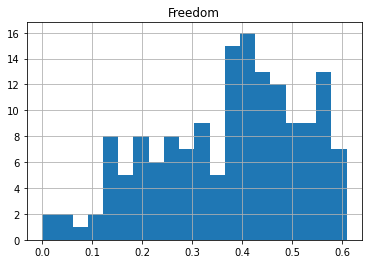

In [22]:
df.hist(column="Freedom",bins=20)

Something I have felt interested in since first checking out the data set is the "Freedom" score. Here I get to see the distribution and looks a bit skewed to the left. It seeems like there are a lot of countries with higher freedom scores, but definitely some on the lower end. Does Freedom lead to happiness? This column will likely help us determine the answer to this question. 

array([[<AxesSubplot:title={'center':'Economy (GDP per Capita)'}>]],
      dtype=object)

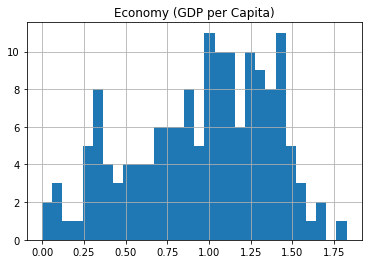

In [26]:
df.hist(column="Economy (GDP per Capita)",bins=30)

I also am interested in how a country's economy impacts their happiness and potentially their freedom. This histogram gives me a good picture of the distribtution of GDPs. I see that they are mostly grouped onn the higher end, with the median around 1.00. 

array([[<AxesSubplot:title={'center':'Happiness Score'}>]], dtype=object)

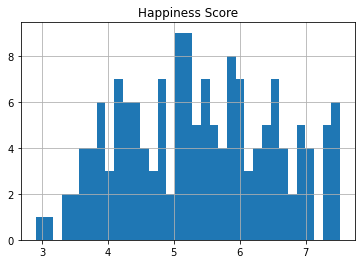

In [30]:
df.hist(column="Happiness Score",bins=35)

# Defining Objectives

Objectives

1. What impact does a country's Life Expectancy have on their happiness score?
2. Are certain regions considered to have more freedom than others?
3. How does citizen's trust in their goverment (corruption) influece the country's economy?

# Presention of Findings

One thing that can help us in our analysis moving forward is a correlation table. This will help us see which variables are more and less correlated.

In [34]:
df.corr()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


This table is helpful but a correlation matrix will help us visualize this even further. 

<AxesSubplot:>

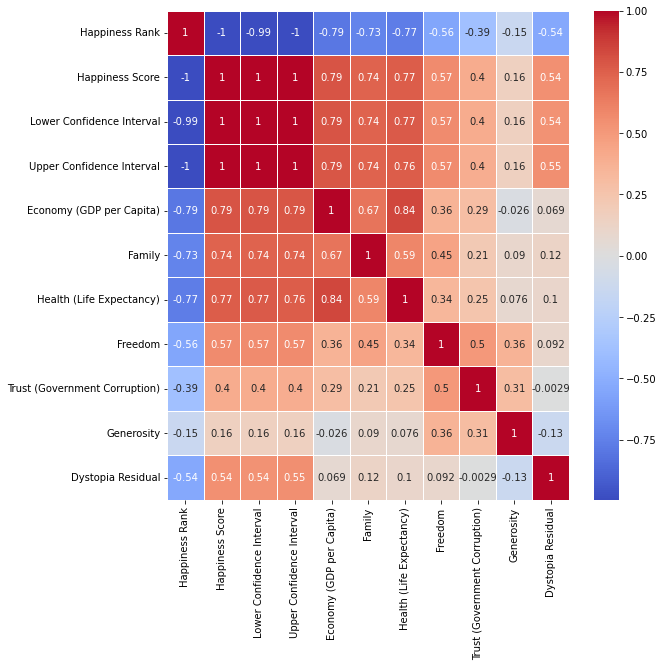

In [42]:
corr_matrix = df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap="coolwarm")

First up is "What impact does a country's life expectancy have on their happiness score?

The main two columns we are interested in here are life expectancy, happiness rank, and happiness score so let's pull out just their summary statistics. 

In [33]:
summary = df.describe()

print(summary[['Happiness Rank', 'Happiness Score', 'Health (Life Expectancy)']])

       Happiness Rank  Happiness Score  Health (Life Expectancy)
count      157.000000       157.000000                157.000000
mean        78.980892         5.382185                  0.557619
std         45.466030         1.141674                  0.229349
min          1.000000         2.905000                  0.000000
25%         40.000000         4.404000                  0.382910
50%         79.000000         5.314000                  0.596590
75%        118.000000         6.269000                  0.729930
max        157.000000         7.526000                  0.952770


This might also be a good opportunity for a scatterplot showing Health on the x axis and Happiness Score on the y axis. This will help us compare our two variables. 

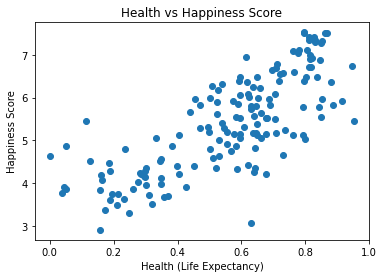

In [45]:
plt.scatter(x=df['Health (Life Expectancy)'], y=df['Happiness Score'])

plt.title('Health vs Happiness Score')

plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')

plt.show()

This is helpful and shows us that we might have a positive correlation but let's add a line of best fit to really get the full picture.

Text(0, 0.5, 'Happiness Score')

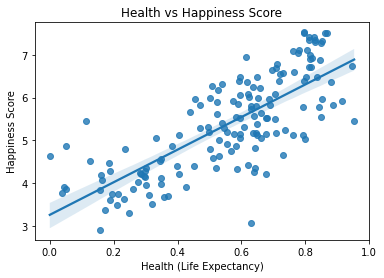

In [65]:
sns.regplot(x="Health (Life Expectancy)", y='Happiness Score', data=df)
plt.title('Health vs Happiness Score')

plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')

Conclusion: As seen in the correlation matrix, the correlation coefficient betweek Health and Happiness Score is 0.77. This shows us that there is a positive correlation between these two variables. Based on this and our two scatter plots, we can conclude that in general, as a country's Health as based on Life Expectancy increases, so does their happiness. I used correlation and scatterplots here as they do a good job of showing us the relationship between two different variables. 

Objective 2: Are certain regions considered to have more freedom than others?

First it might be a good idea to see what regions we are dealing with. 

In [49]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

So these are the unique regions we are looking at, it looks like there are 10 of them. Let's see how many of each are included. 

In [50]:
pd.value_counts(df['Region'])

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

Looks like the most common region is Sub-Saharan Africa with 38 countries, and the least is both North America and Australia and New Zealand. Let's visualize our data using box plots to see how these regions compare on their Freedom Scores.

Text(0, 0.5, 'Freedom Score')

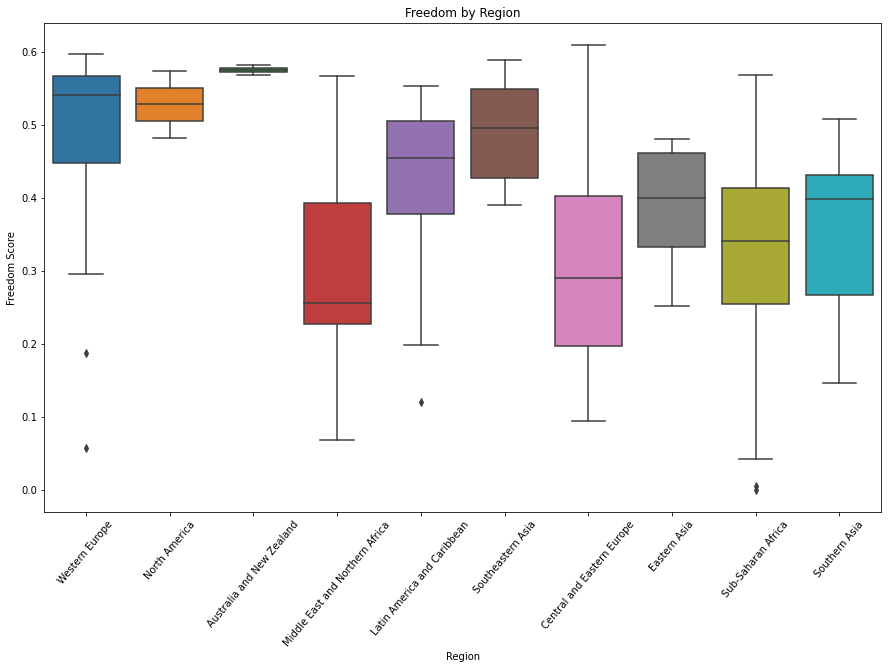

In [68]:
plt.figure(figsize=(15,9))
box = sns.boxplot(x="Region", y="Freedom", data=df)
box.set_xticklabels(box.get_xticklabels(), rotation=50)
plt.title('Freedom by Region')

plt.xlabel('Region')
plt.ylabel('Freedom Score')

This box plot comparison offers us great insight into our question of whether different regions have different levels of Freedom. We see the Australia and New Zealand region is hard to see as there are only two countries that presumably have very similar levels of freedom. We see that the lowest median of freedom comes in the Middle East and Northern Africa. The highest median is found in Western Europe. Both of these make sense based on our knowledge of freedom throughout the world. We see a very large range in Sub-Saharan Africa, telling us that while there are some countries with little freedom, there also are some very free nations. This plot works great and really helps us get a picutre of freedom throughout the regions in our data. 

Our final objective is to determine How citizen's trust in their goverment (corruption) influeces the country's economy. We want to determine correlation so we will again view our heat map and see what correlation might be present. This will help us be able to compare these two variables.

<AxesSubplot:>

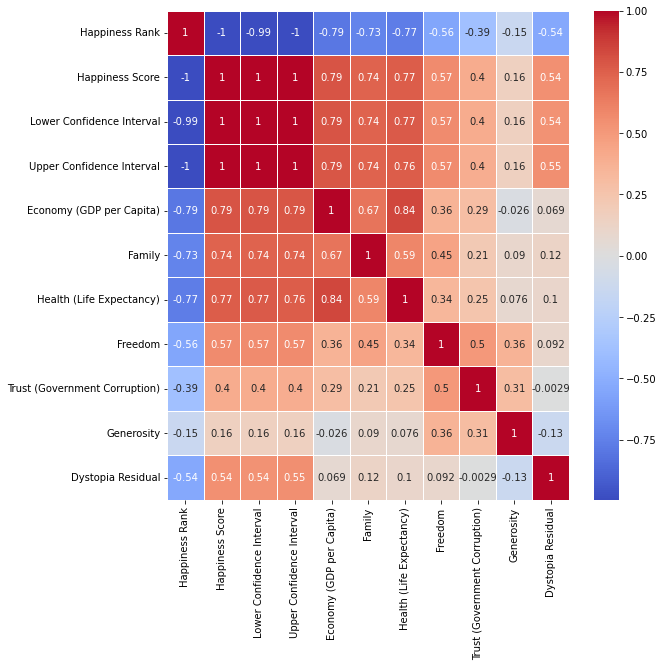

In [69]:
corr_matrix = df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr_matrix, annot=True, linewidth=.5, cmap="coolwarm")

We see here that Trust and Economy have a correlation coefficient of only 0.29. This would imply that they aren't super closely correlated. However, let's take a look at a scatterplot to get another visual. 

Text(0, 0.5, 'Trust (Government Corruption)')

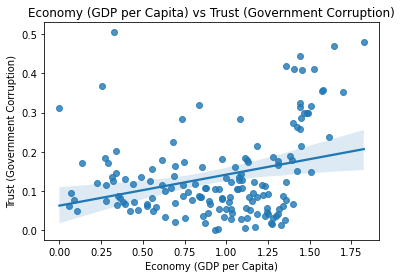

In [70]:
sns.regplot(x="Economy (GDP per Capita)", y='Trust (Government Corruption)', data=df)
plt.title('Economy (GDP per Capita) vs Trust (Government Corruption)')

plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Trust (Government Corruption)')

We see in this scatterplot that while there might be a small positive correlation between our two variables, it isn't super strong. We can say with limited accuracy that as a country's GDP increases, their Trust does the same. Again, the correlation coefficient is only 0.29 so the connection is quite weak. 

# Ethics

There are a few ethical quandries I considered when analyzing this data. Probably the most prudent was how a country's Trust was calculated. I would be interested to see how to quantify something like trust. Also, what portions of the population are able to weigh in on this decision. Typically, people with a lot of wealth may have, or say they have, trust in the government because the system is working for them. People more towards the bottom of the economic spectrum may have limited trust in their government because it hasn't provided them with as many opportunities. This is definitely an ethical concern I see in this data set. 